<a href="https://colab.research.google.com/github/jennyrahma/Dicoding/blob/main/Proyek_Analisis_Data_Benar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Jenny Rahma Hidaya]
- **Email:** [m191b4kx2057@bangkit.academy]
- **ID Dicoding:** [jennyrhmaa]

## Menentukan Pertanyaan Bisnis



- Pertanyaan 1 : Apa faktor yang paling mempengaruhi jumlah penyewaan sepeda per hari?
- Pertanyaan 2 : Bagaimana pola penggunaan sepeda berdasarkan waktu (musim, bulan, hari)?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Data Wrangling

### Gathering Data

In [6]:
from google.colab import files
uploaded = files.upload()


Saving day.csv to day.csv


In [7]:
day_df = pd.read_csv('day.csv')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
from google.colab import files
uploaded = files.upload()


Saving Readme.txt to Readme.txt
Saving hour.csv to hour.csv


In [15]:
hour_df = pd.read_csv('hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari beberapa file: day.csv dan hour.csv.
- Variabel kunci yang perlu diperhatikan adalah cnt (jumlah penyewaan), temp (suhu), season (musim), hum (kelembapan), dan windspeed (kecepatan angin).

### Assessing Data

In [8]:
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


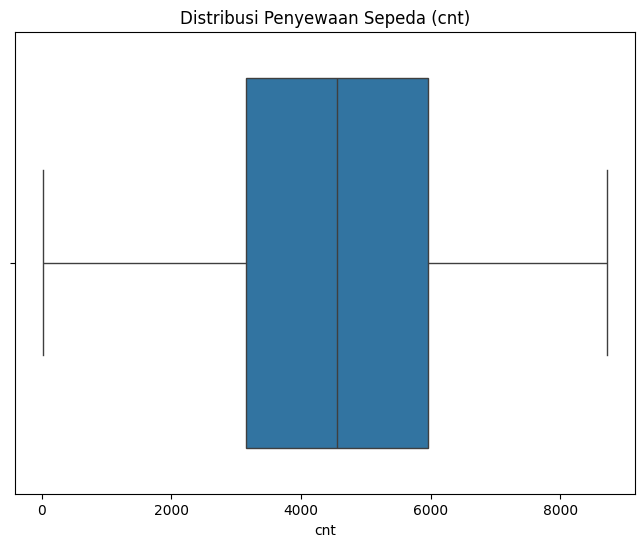

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x=day_df['cnt'])
plt.title('Distribusi Penyewaan Sepeda (cnt)')
plt.show()

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset tidak memiliki nilai yang hilang, namun terdapat beberapa outlier yang perlu diperhatikan dalam analisis lanjutan.
- Variabel seperti season dan workingday adalah variabel kategorikal yang mungkin perlu dikonversi menjadi tipe yang sesuai untuk analisis.

### Cleaning Data

In [18]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [19]:
for column in ['temp', 'atemp', 'hum', 'windspeed']:
    q1 = day_df[column].quantile(0.25)
    q3 = day_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    day_df = day_df[(day_df[column] >= lower_bound) & (day_df[column] <= upper_bound)]


In [20]:
for column in ['season', 'mnth', 'yr', 'weathersit']:
    day_df[column] = day_df[column].astype('category')

In [21]:
print(day_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     717 non-null    int64         
 1   dteday      717 non-null    datetime64[ns]
 2   season      717 non-null    category      
 3   yr          717 non-null    category      
 4   mnth        717 non-null    category      
 5   holiday     717 non-null    int64         
 6   weekday     717 non-null    int64         
 7   workingday  717 non-null    int64         
 8   weathersit  717 non-null    category      
 9   temp        717 non-null    float64       
 10  atemp       717 non-null    float64       
 11  hum         717 non-null    float64       
 12  windspeed   717 non-null    float64       
 13  casual      717 non-null    int64         
 14  registered  717 non-null    int64         
 15  cnt         717 non-null    int64         
dtypes: category(4), datetime64[ns](

In [22]:
day_df.to_csv('cleaned_data.csv', index=False)

In [23]:
Q1 = day_df['casual'].quantile(0.25)
Q3 = day_df['casual'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menghapus outlier
day_df_cleaned = day_df[(day_df['casual'] >= lower_bound) & (day_df['casual'] <= upper_bound)]

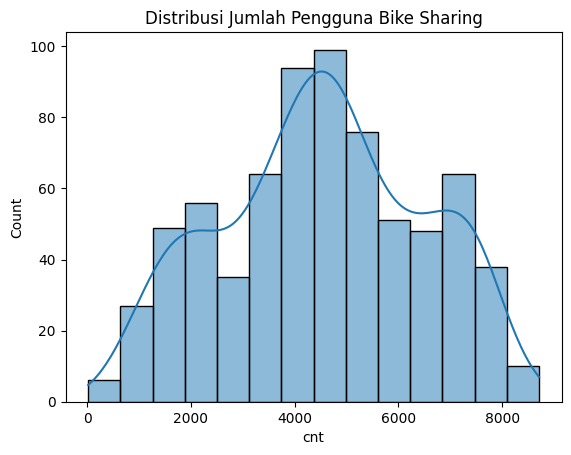

In [24]:
sns.histplot(day_df['cnt'], kde=True)
plt.title('Distribusi Jumlah Pengguna Bike Sharing')
plt.show()

In [25]:
missing_values = day_df.isnull().sum()
print(missing_values)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [26]:
day_df['season'] = day_df['season'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['month'] = day_df['mnth'].astype('category')


In [27]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [28]:
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    hour_df[col] = hour_df[col].astype('category')

In [29]:
hour_df.drop(columns=['instant'], inplace=True)  # Hapus kolom instant jika tidak diperlukan


In [30]:
print(hour_df['season'].value_counts())
print(hour_df['weathersit'].value_counts())

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


In [31]:
# Mengonversi kolom kategorikal
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

# Memeriksa statistik deskriptif
print(hour_df[['cnt', 'casual', 'registered']].describe())

# Menghapus outlier
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
hour_df = hour_df[(hour_df['cnt'] >= (Q1 - 1.5 * IQR)) & (hour_df['cnt'] <= (Q3 + 1.5 * IQR))]

# Memeriksa nilai minimal dan maksimal
print(hour_df[['windspeed', 'temp', 'atemp']].describe())

# Mendefinisikan ulang nilai kategorikal
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
hour_df['season'] = hour_df['season'].map(season_mapping)

# Memisahkan kolom
numerical_cols = hour_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = hour_df.select_dtypes(include=['category']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


                cnt        casual    registered
count  17379.000000  17379.000000  17379.000000
mean     189.463088     35.676218    153.786869
std      181.387599     49.305030    151.357286
min        1.000000      0.000000      0.000000
25%       40.000000      4.000000     34.000000
50%      142.000000     17.000000    115.000000
75%      281.000000     48.000000    220.000000
max      977.000000    367.000000    886.000000
          windspeed          temp         atemp
count  16874.000000  16874.000000  16874.000000
mean       0.189619      0.492650      0.471970
std        0.122460      0.192455      0.171878
min        0.000000      0.020000      0.000000
25%        0.104500      0.340000      0.333300
50%        0.179100      0.500000      0.484800
75%        0.253700      0.640000      0.621200
max        0.850700      1.000000      1.000000
Numerical Columns: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Categorical Columns: ['season', 'yr', 'mnth', 'h

<ipython-input-31-77f9ed5e6926>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour_df['season'] = hour_df['season'].map(season_mapping)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [32]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
count,717.000000,717,717.0,717.0,717.0,717.000000,717.0,717.000000,717.0,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.0
unique,NaN,NaN,4.0,2.0,12.0,NaN,7.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
top,NaN,NaN,3.0,0.0,5.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
freq,NaN,NaN,188.0,359.0,62.0,NaN,103.0,NaN,453.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
mean,366.779637,2012-01-01 18:42:40.669455872,NaN,NaN,NaN,0.029289,NaN,0.684798,NaN,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000,NaN
25%,185.000000,2011-07-04 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000,NaN
50%,365.000000,2011-12-31 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000,NaN
75%,550.000000,2012-07-03 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000,NaN


In [33]:
# Group by season, year, and month
grouped = day_df.groupby(['season', 'yr'], observed=False).agg(
    total_cnt=('cnt', 'sum'),
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum'),
    average_temp=('temp', 'mean'),
    average_hum=('hum', 'mean'),
    average_windspeed=('windspeed', 'mean')
).reset_index()

# Menampilkan hasil group by
print(grouped)


  season yr  total_cnt  total_casual  total_registered  average_temp  \
0      1  0     145829         20639            125190      0.269130   
1      1  1     302011         37560            264451      0.321752   
2      2  0     342406         76663            265743      0.535153   
3      2  1     565715        125163            440552      0.555752   
4      3  0     419650         95450            324200      0.701174   
5      3  1     641479        130641            510838      0.711445   
6      4  0     321942         52342            269600      0.425883   
7      4  1     511017         75971            435046      0.418707   

   average_hum  average_windspeed  
0     0.591266           0.208189  
1     0.597434           0.200253  
2     0.660977           0.201755  
3     0.596971           0.199197  
4     0.644677           0.177308  
5     0.622287           0.166882  
6     0.694791           0.165244  
7     0.642723           0.173333  


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


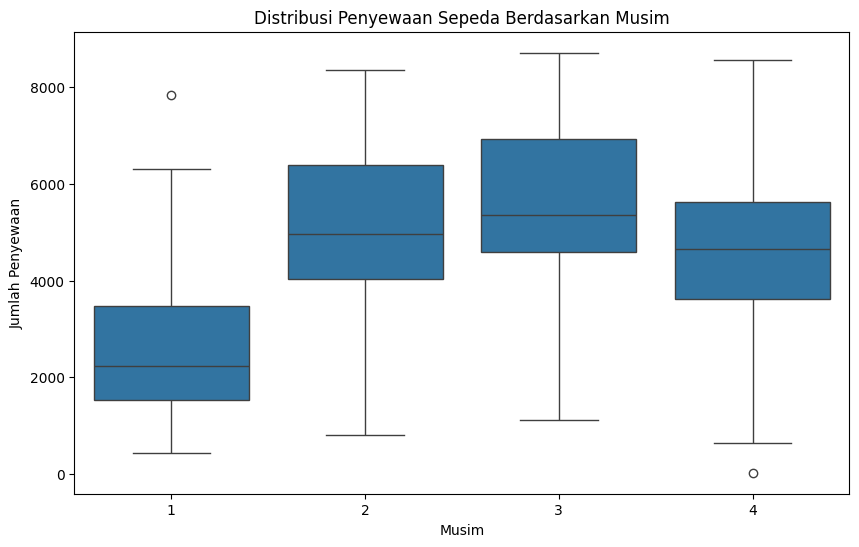

In [34]:
# Visualisasi distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()


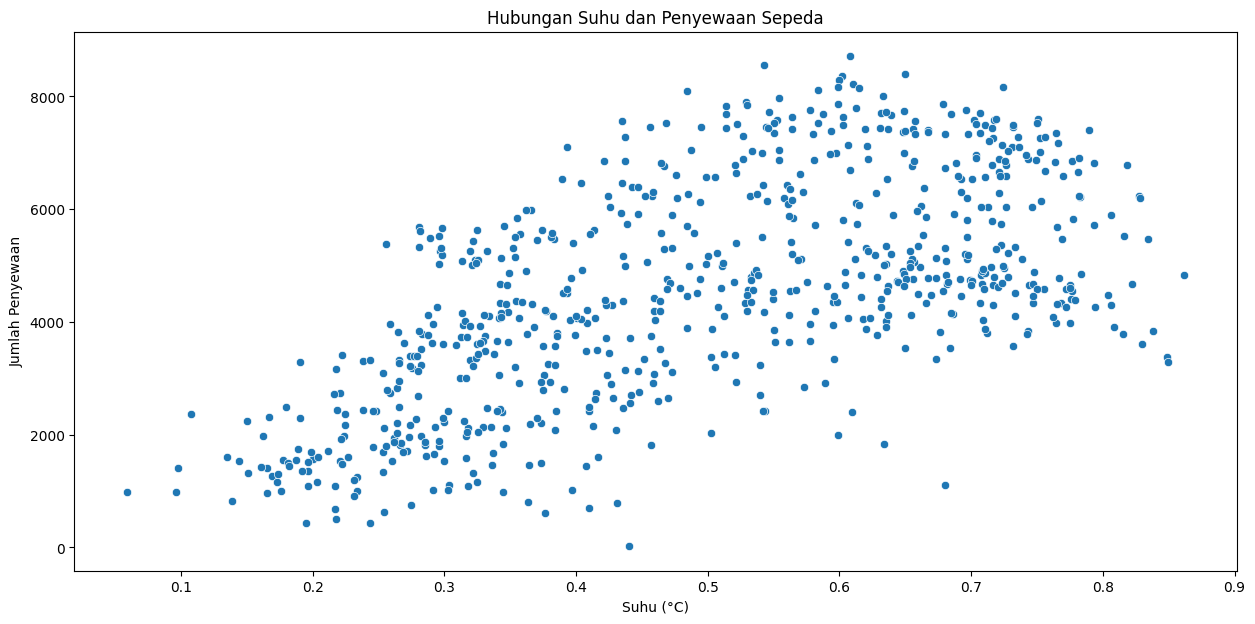

In [35]:
# Visualisasi hubungan antara suhu dan penyewaan sepeda
plt.figure(figsize=(15,7))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


In [36]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874,16874,16874.0,16874.0,16874.0,16874.0,16874.0,16874.0,16874.0,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,4,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,0.0,12.0,23.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4298,8644.0,1470.0,728.0,16376.0,2474.0,11451.0,11020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-26 23:54:06.699063808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,2011-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


In [37]:
# Group by season, year, and month for hour_df
grouped_hour = hour_df.groupby(['season', 'yr', 'mnth'], observed=False).agg(
    total_cnt=('cnt', 'sum'),
    total_casual=('casual', 'sum'),
    total_registered=('registered', 'sum'),
    average_temp=('temp', 'mean'),
    average_hum=('hum', 'mean'),
    average_windspeed=('windspeed', 'mean')
).reset_index()

# Menampilkan hasil group by
print(grouped_hour)


    season yr mnth  total_cnt  total_casual  total_registered  average_temp  \
0   Winter  0    1      38189          3073             35116      0.197413   
1   Winter  0    2      48215          6242             41973      0.283975   
2   Winter  0    3      41206          8957             32249      0.342468   
3   Winter  0    4          0             0                 0           NaN   
4   Winter  0    5          0             0                 0           NaN   
..     ... ..  ...        ...           ...               ...           ...   
91    Fall  1    8          0             0                 0           NaN   
92    Fall  1    9      37841          6873             30968      0.563457   
93    Fall  1   10     145245         26388            118857      0.499937   
94    Fall  1   11     138423         19234            119189      0.335036   
95    Fall  1   12      93930          9629             84301      0.357987   

    average_hum  average_windspeed  
0      0.57405

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


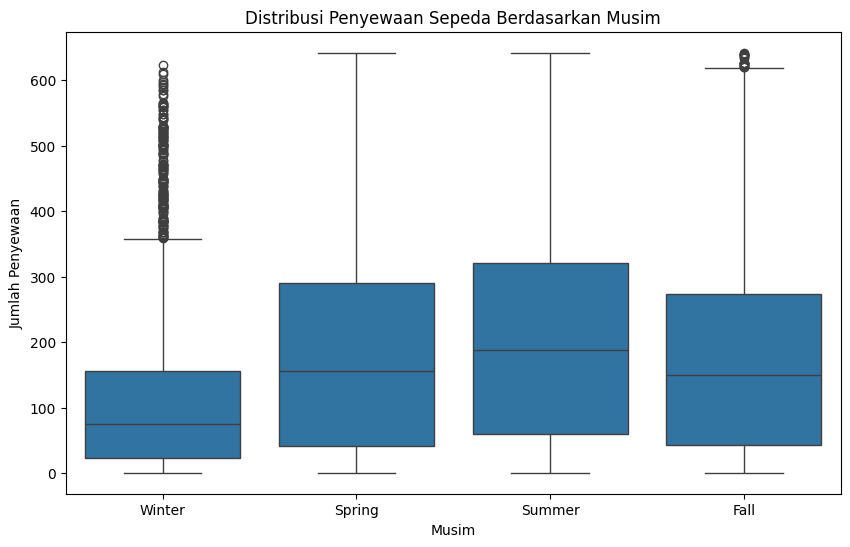

In [38]:
# Visualisasi distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()


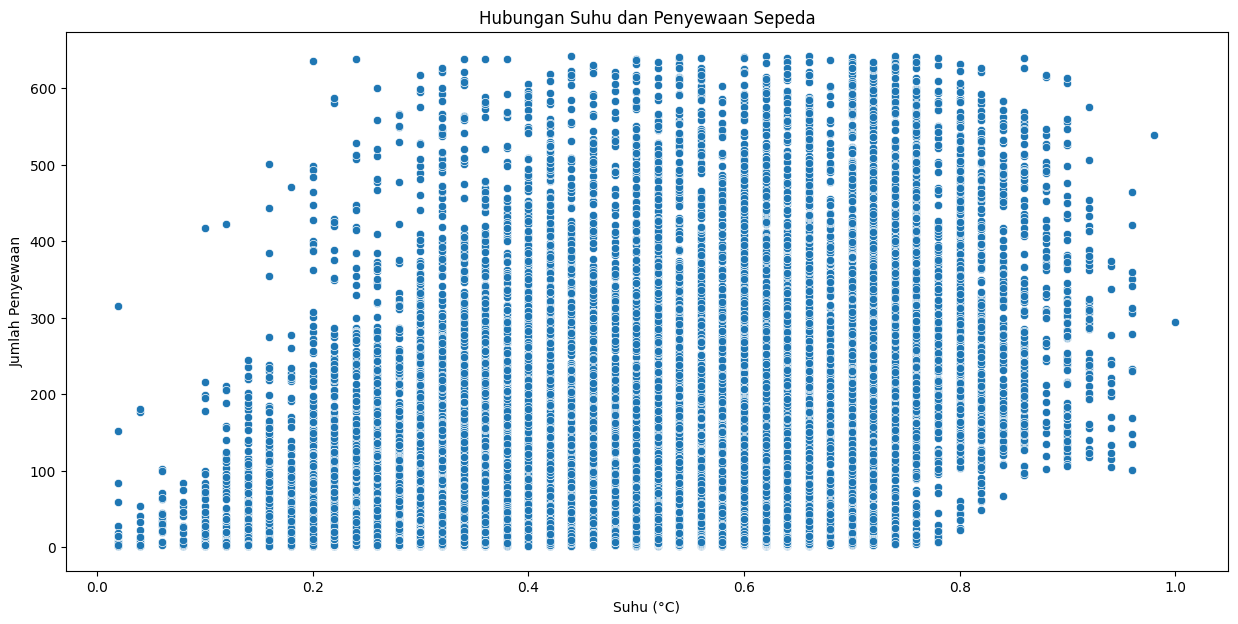

In [39]:
# Visualisasi hubungan antara suhu dan penyewaan sepeda
plt.figure(figsize=(15,7))
sns.scatterplot(x='temp', y='cnt', data=hour_df)
plt.title('Hubungan Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda. Penyewaan cenderung meningkat seiring dengan naiknya suhu.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

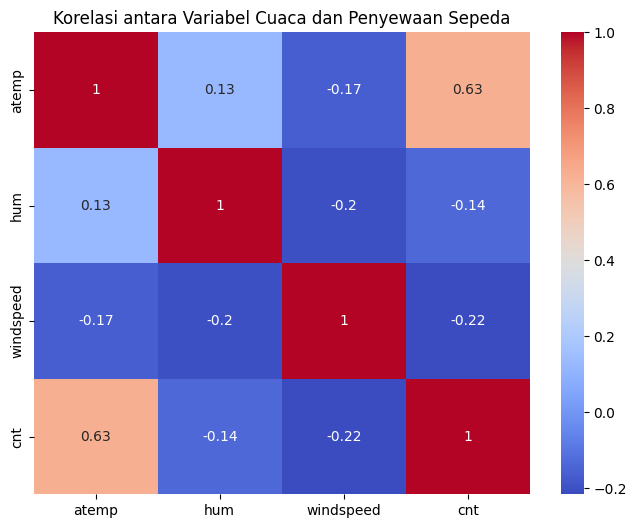

In [40]:
# Menghitung korelasi
correlation = day_df[['atemp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi korelasi
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel Cuaca dan Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:

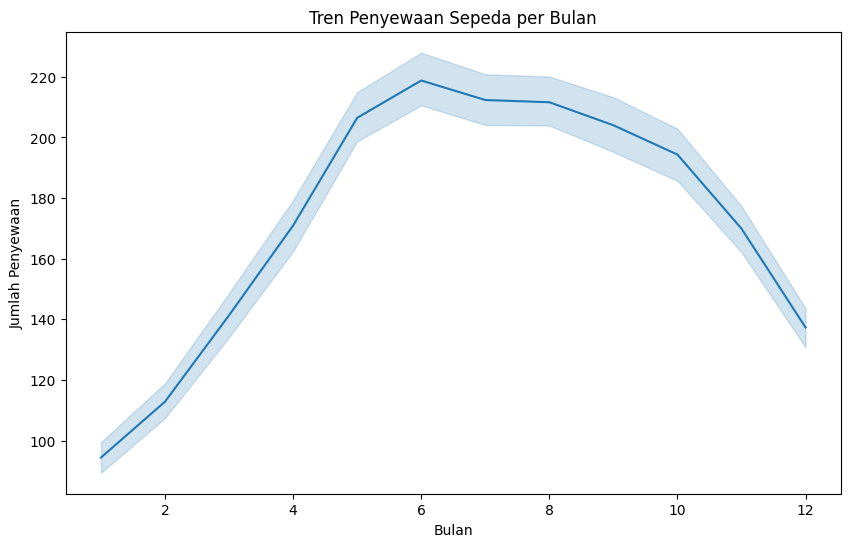

In [41]:
# Visualisasi tren penggunaan sepeda sepanjang waktu
hour_df['mnth'] = pd.to_datetime(hour_df['dteday']).dt.month

plt.figure(figsize=(10,6))
sns.lineplot(x='mnth', y='cnt', data=hour_df)
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Pertanyaan 1:
a. Suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda.
b. Kelembapan (humidity) dan kecepatan angin (windspeed) memiliki korelasi negatif yang lebih lemah.
- Pertanyaan 2:
Penyewaan sepeda cenderung meningkat pada bulan-bulan musim panas (Juni, Juli, Agustus), dengan puncak penggunaan di bulan Juli.

## Analisis Lanjutan (Opsional)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fitur dan target
X = day_df[['temp', 'hum', 'windspeed']]
y = day_df['cnt']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model regresi linier
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Menghitung error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1981654.4476316962


## Conclusion

- Conclution pertanyaan 1: Suhu adalah faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda, sementara kelembapan dan kecepatan angin memiliki pengaruh yang lebih kecil.
- Conclution pertanyaan 2: Pola penggunaan sepeda menunjukkan peningkatan pada bulan-bulan musim panas, dengan puncaknya pada bulan Juli.

In [43]:
# Misalkan Anda memiliki tiga DataFrame
data1 = day_df
data2 = hour_df

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Menggabungkan DataFrame
all_df = pd.concat([df1, df2], ignore_index=True)

# Menyimpan ke CSV
all_df.to_csv("all_data.csv", index=False)


In [44]:
all_df.to_csv("all_data.csv", index=False)

In [45]:
!pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.0
aiohttp==3.10.6
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.3
astropy-iers-data==0.2024.9.23.0.31.43
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.19.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
Bottleneck==1.4.0
bqplot==0.12.43
branca==0.8.0
build==1.2.2
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.3
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6


In [ ]:
# Menulis ke file requirements.txt
with open('requirements.txt', 'w') as f:
    f.write('pandas\n')
    f.write('numpy\n')
    f.write('matplotlib\n')
    f.write('seaborn\n')
    f.write('streamlit\n')

In [ ]:
!pip install -r requirements.txt


In [ ]:
!pip install pyngrok


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
%%writefile dashboard.py
import streamlit as st
import pandas as pd

# Judul untuk dashboard
st.title("Dashboard Bike Sharing Data")

# Membaca dataset
data = pd.read_csv('data_1.csv')

# Menampilkan dataset
st.write("Dataset Bike Sharing:")
st.dataframe(data)

# Visualisasi data sederhana
st.line_chart(data[['temp', 'hum', 'windspeed']])

st.bar_chart(data[['casual', 'registered']])


Writing dashboard.py


In [48]:
# Menulis ke file requirements.txt
with open('requirements.txt', 'w') as f:
    f.write('pandas\n')
    f.write('numpy\n')
    f.write('matplotlib\n')
    f.write('seaborn\n')
    f.write('streamlit\n')